In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('Final_dataset.csv')
data

,Country,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Vendor,Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,LineItemInsurance,Manufacturing country,Manufacturing_Country_Lat,Manufacturing_Country_Lon,Warehouse_Country_Lat,Warehouse_Country_Lon,Distance_to_Warehouse_mi,Delay
0,Nigeria,EXW,Air,2008-05-02,2008-02-05,"Orgenics, Ltd",650,6.50,0.01,0.00,Yes,0.01,India,22.351115,78.667743,9.600036,7.999972,6306,-87
1,Haiti,EXW,Air,2008-02-18,2008-02-18,"Trinity Biotech, Plc",2,278.00,139.00,1.39,Yes,0.44,India,22.351115,78.667743,19.139995,-72.357097,6831,0
2,Guyana,EXW,Air,2008-09-04,2008-04-01,"Orgenics, Ltd",240,2.40,0.01,0.00,Yes,0.00,India,22.351115,78.667743,4.841710,-58.641689,6831,-156
3,South Africa,DDP,Truck,2008-04-24,2008-04-24,S. BUYS WHOLESALER,6,405.06,67.51,0.25,Yes,0.65,Switzerland,46.798562,8.231974,-28.816624,24.991639,5328,0
4,South Africa,DDP,Truck,2008-04-24,2008-04-24,S. BUYS WHOLESALER,600,870.00,1.45,0.01,No,1.39,France,46.603354,1.888334,-28.816624,24.991639,5407,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,"Congo, DRC",N/A - From RDC,Air,2012-03-22,2012-03-22,SCMS from RDC,23,53.59,2.33,0.04,Yes,0.08,India,22.351115,78.667743,-2.981434,23.822264,3790,0
6997,"Congo, DRC",N/A - From RDC,Air,2012-03-22,2012-03-22,SCMS from RDC,23,53.59,2.33,0.04,Yes,0.08,India,22.351115,78.667743,-2.981434,23.822264,3790,0
6998,Rwanda,N/A - From RDC,Air,2012-08-06,2012-06-01,SCMS from RDC,1004,8534.00,8.50,0.04,Yes,11.96,India,22.351115,78.667743,-1.964663,30.064436,3714,-66
6999,Uganda,N/A - From RDC,Truck,2012-06-12,2012-11-20,SCMS from RDC,25,169.00,6.76,0.11,Yes,0.24,India,22.351115,78.667743,1.533355,32.216658,3714,161


In [3]:
continent_map = {
    'Afghanistan': 'Asia', 'Angola': 'Africa', 'Armenia': 'Asia', 'Bangladesh': 'Asia',
    'Benin': 'Africa', 'Bolivia': 'South America', 'Burkina Faso': 'Africa', 'Burundi': 'Africa',
    'Cambodia': 'Asia', 'Cameroon': 'Africa', 'Central African Republic': 'Africa', 
    'Chad': 'Africa', 'Congo, DRC': 'Africa', 'Dominican Republic': 'North America', 
    'El Salvador': 'North America', 'Ethiopia': 'Africa', 'Ghana': 'Africa', 
    'Guatemala': 'North America', 'Guinea': 'Africa', 'Guyana': 'South America', 
    'Haiti': 'North America', 'India': 'Asia', 'Ivory Coast': 'Africa', 'Kazakhstan': 'Asia', 
    'Kenya': 'Africa', 'Kyrgyzstan': 'Asia', 'Lesotho': 'Africa', 'Liberia': 'Africa', 
    'Libya': 'Africa', 'Malawi': 'Africa', 'Mali': 'Africa', 'Mozambique': 'Africa', 
    'Myanmar': 'Asia', 'Nigeria': 'Africa', 'Niger': 'Africa', 'Pakistan': 'Asia', 
    'Papua New Guinea': 'Oceania', 'Rwanda': 'Africa', 'Senegal': 'Africa', 
    'Sierra Leone': 'Africa', 'South Africa': 'Africa', 'South Sudan': 'Africa', 
    'Sudan': 'Africa', 'Swaziland': 'Africa', 'Tanzania': 'Africa', 'Thailand': 'Asia', 
    'Togo': 'Africa', 'Uganda': 'Africa', 'Uzbekistan': 'Asia', 'Vietnam': 'Asia', 
    'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

data['Continent'] = data['Country'].map(continent_map)
data[['Country', 'Continent']].head()
data

,Country,Vendor INCO Term,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Vendor,Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,LineItemInsurance,Manufacturing country,Manufacturing_Country_Lat,Manufacturing_Country_Lon,Warehouse_Country_Lat,Warehouse_Country_Lon,Distance_to_Warehouse_mi,Delay,Continent
0,Nigeria,EXW,Air,2008-05-02,2008-02-05,"Orgenics, Ltd",650,6.50,0.01,0.00,Yes,0.01,India,22.351115,78.667743,9.600036,7.999972,6306,-87,Africa
1,Haiti,EXW,Air,2008-02-18,2008-02-18,"Trinity Biotech, Plc",2,278.00,139.00,1.39,Yes,0.44,India,22.351115,78.667743,19.139995,-72.357097,6831,0,North America
2,Guyana,EXW,Air,2008-09-04,2008-04-01,"Orgenics, Ltd",240,2.40,0.01,0.00,Yes,0.00,India,22.351115,78.667743,4.841710,-58.641689,6831,-156,South America
3,South Africa,DDP,Truck,2008-04-24,2008-04-24,S. BUYS WHOLESALER,6,405.06,67.51,0.25,Yes,0.65,Switzerland,46.798562,8.231974,-28.816624,24.991639,5328,0,Africa
4,South Africa,DDP,Truck,2008-04-24,2008-04-24,S. BUYS WHOLESALER,600,870.00,1.45,0.01,No,1.39,France,46.603354,1.888334,-28.816624,24.991639,5407,0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6996,"Congo, DRC",N/A - From RDC,Air,2012-03-22,2012-03-22,SCMS from RDC,23,53.59,2.33,0.04,Yes,0.08,India,22.351115,78.667743,-2.981434,23.822264,3790,0,Africa
6997,"Congo, DRC",N/A - From RDC,Air,2012-03-22,2012-03-22,SCMS from RDC,23,53.59,2.33,0.04,Yes,0.08,India,22.351115,78.667743,-2.981434,23.822264,3790,0,Africa
6998,Rwanda,N/A - From RDC,Air,2012-08-06,2012-06-01,SCMS from RDC,1004,8534.00,8.50,0.04,Yes,11.96,India,22.351115,78.667743,-1.964663,30.064436,3714,-66,Africa
6999,Uganda,N/A - From RDC,Truck,2012-06-12,2012-11-20,SCMS from RDC,25,169.00,6.76,0.11,Yes,0.24,India,22.351115,78.667743,1.533355,32.216658,3714,161,Africa


In [4]:
def rename_shipment_mode(mode):
    if mode in ['Air', 'Air Charter']:
        return 'Air_All'
    elif mode in ['Truck', 'Ocean']:
        return 'Ground_Sea'
    else:
        return mode  
data['Shipment Mode'] = data['Shipment Mode'].apply(rename_shipment_mode)

print(data.head())

        Country Vendor INCO Term Shipment Mode Scheduled Delivery Date  \
0       Nigeria              EXW       Air_All              2008-05-02   
1         Haiti              EXW       Air_All              2008-02-18   
2        Guyana              EXW       Air_All              2008-09-04   
3  South Africa              DDP    Ground_Sea              2008-04-24   
4  South Africa              DDP    Ground_Sea              2008-04-24   

  Delivered to Client Date                Vendor  Line Item Quantity  \
0               2008-02-05         Orgenics, Ltd                 650   
1               2008-02-18  Trinity Biotech, Plc                   2   
2               2008-04-01         Orgenics, Ltd                 240   
3               2008-04-24    S. BUYS WHOLESALER                   6   
4               2008-04-24    S. BUYS WHOLESALER                 600   

   Line Item Value  Pack Price  Unit Price First Line Designation  \
0             6.50        0.01        0.00           

In [5]:
vendor_frequency = data['Vendor'].value_counts()
quantile_values = vendor_frequency.quantile([0.90, 0.70, 0.40]).tolist()

def vendor_binning(value):
    if value >= quantile_values[0]:
        return 'High Frequency'
    elif value >= quantile_values[1]:
        return 'Medium Frequency'
    elif value >= quantile_values[2]:
        return 'Low Frequency'
    else:
        return 'Rare Frequency'

data['Vendor_Frequency_Bin'] = data['Vendor'].map(vendor_frequency).apply(vendor_binning)
data[['Vendor', 'Vendor_Frequency_Bin']].head()
print(data.head())

        Country Vendor INCO Term Shipment Mode Scheduled Delivery Date  \
0       Nigeria              EXW       Air_All              2008-05-02   
1         Haiti              EXW       Air_All              2008-02-18   
2        Guyana              EXW       Air_All              2008-09-04   
3  South Africa              DDP    Ground_Sea              2008-04-24   
4  South Africa              DDP    Ground_Sea              2008-04-24   

  Delivered to Client Date                Vendor  Line Item Quantity  \
0               2008-02-05         Orgenics, Ltd                 650   
1               2008-02-18  Trinity Biotech, Plc                   2   
2               2008-04-01         Orgenics, Ltd                 240   
3               2008-04-24    S. BUYS WHOLESALER                   6   
4               2008-04-24    S. BUYS WHOLESALER                 600   

   Line Item Value  Pack Price  Unit Price  ... LineItemInsurance  \
0             6.50        0.01        0.00  ...      

In [6]:
region_map = {
    'Australia': 'Oceania', 
    'Cyprus': 'Europe', 
    'France': 'Europe', 
    'Germany': 'Europe', 
    'India': 'Asia',
    'Italy': 'Europe', 
    'Netherlands': 'Europe', 
    'Poland': 'Europe', 
    'Saudi Arabia': 'Asia',
    'Spain': 'Europe', 
    'Switzerland': 'Europe', 
    'Thailand': 'Asia', 
    'United Kingdom': 'Europe',
    'United States': 'North America'
}
data['Region'] = data['Manufacturing country'].map(region_map)
data[['Manufacturing country', 'Region']].head()

,Manufacturing country,Region
0,India,Asia
1,India,Asia
2,India,Asia
3,Switzerland,Europe
4,France,Europe


In [7]:
print(data.head())

        Country Vendor INCO Term Shipment Mode Scheduled Delivery Date  \
0       Nigeria              EXW       Air_All              2008-05-02   
1         Haiti              EXW       Air_All              2008-02-18   
2        Guyana              EXW       Air_All              2008-09-04   
3  South Africa              DDP    Ground_Sea              2008-04-24   
4  South Africa              DDP    Ground_Sea              2008-04-24   

  Delivered to Client Date                Vendor  Line Item Quantity  \
0               2008-02-05         Orgenics, Ltd                 650   
1               2008-02-18  Trinity Biotech, Plc                   2   
2               2008-04-01         Orgenics, Ltd                 240   
3               2008-04-24    S. BUYS WHOLESALER                   6   
4               2008-04-24    S. BUYS WHOLESALER                 600   

   Line Item Value  Pack Price  Unit Price  ... Manufacturing country  \
0             6.50        0.01        0.00  ...  

In [8]:
inco_term_map = {
    'EXW': 'Minimal Responsibility',
    'FCA': 'Moderate Responsibility',
    'FAS': 'Moderate Responsibility',
    'CPT': 'Substantial Responsibility',
    'CIP': 'Substantial Responsibility',
    'DAP': 'Substantial Responsibility',
    'DAT': 'Substantial Responsibility',
    'DDP': 'Maximum Responsibility',
    'CIF': 'Maximum Responsibility',
    'CFR': 'Maximum Responsibility',
    'N/A - From RDC': 'Not Applicable'
}
data['INCO_Term_Group'] = data['Vendor INCO Term'].map(inco_term_map)
data[['Vendor INCO Term', 'INCO_Term_Group']].head()

,Vendor INCO Term,INCO_Term_Group
0,EXW,Minimal Responsibility
1,EXW,Minimal Responsibility
2,EXW,Minimal Responsibility
3,DDP,Maximum Responsibility
4,DDP,Maximum Responsibility


In [9]:
selected_data = data[['INCO_Term_Group', 'Region', 'Vendor_Frequency_Bin', 'Continent', 'First Line Designation']]
print(selected_data.head())

          INCO_Term_Group  Region Vendor_Frequency_Bin      Continent  \
0  Minimal Responsibility    Asia     Medium Frequency         Africa   
1  Minimal Responsibility    Asia       High Frequency  North America   
2  Minimal Responsibility    Asia     Medium Frequency  South America   
3  Maximum Responsibility  Europe       High Frequency         Africa   
4  Maximum Responsibility  Europe       High Frequency         Africa   

  First Line Designation  
0                    Yes  
1                    Yes  
2                    Yes  
3                    Yes  
4                     No  


In [10]:
selected_data_encoded = selected_data.copy()
label_encoders = {}
for column in selected_data_encoded.columns:
    le = LabelEncoder()
    selected_data_encoded.loc[:, column] = le.fit_transform(selected_data_encoded[column])
    label_encoders[column] = le  
    
print(selected_data_encoded.head())

  INCO_Term_Group Region Vendor_Frequency_Bin Continent First Line Designation
0               1      0                    2         0                      1
1               1      0                    0         2                      1
2               1      0                    2         3                      1
3               0      1                    0         0                      1
4               0      1                    0         0                      0


In [11]:
X = selected_data_encoded 
y = data['Shipment Mode']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CategoricalNB()
model.fit(X_train, y_train)

CategoricalNB()

In [12]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Category naive: {accuracy}")

Accuracy of Category naive: 0.7494646680942184


Confusion Matrix:
 [[742 152]
 [199 308]]
Classification Report:
              precision    recall  f1-score   support

     Air_All       0.79      0.83      0.81       894
  Ground_Sea       0.67      0.61      0.64       507

    accuracy                           0.75      1401
   macro avg       0.73      0.72      0.72      1401
weighted avg       0.75      0.75      0.75      1401



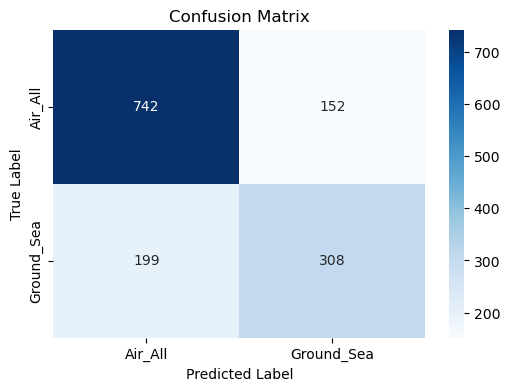

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
class_labels = ['Air_All', 'Ground_Sea']
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [14]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

print("\nSample of training data:")
display(X_train.head())

print("\nSample of testing data:")
display(X_test.head())


Training set shape: (5600, 5) (5600,)
Testing set shape: (1401, 5) (1401,)

Sample of training data:


,INCO_Term_Group,Region,Vendor_Frequency_Bin,Continent,First Line Designation
6641,3,1,0,2,1
3887,1,0,0,0,1
2653,1,0,0,0,0
6975,3,0,0,0,1
6584,3,0,0,0,1



Sample of testing data:


,INCO_Term_Group,Region,Vendor_Frequency_Bin,Continent,First Line Designation
5760,3,1,0,3,1
2944,3,0,0,0,1
2024,3,0,0,0,0
263,0,0,0,0,0
4421,1,0,2,0,1


In [15]:
print("\nSample of training labels (y_train):")
display(y_train.head())

print("\nSample of testing labels (y_test):")
display(y_test.head())


Sample of training labels (y_train):


6641    Air_All
3887    Air_All
2653    Air_All
6975    Air_All
6584    Air_All
Name: Shipment Mode, dtype: object


Sample of testing labels (y_test):


5760       Air_All
2944    Ground_Sea
2024       Air_All
263        Air_All
4421       Air_All
Name: Shipment Mode, dtype: object

In [16]:
# To verify the disjoint nature, you can check for any overlap in indices (which should not exist)
train_indices = set(X_train.index)
test_indices = set(X_test.index)
overlap = train_indices & test_indices  # This should be an empty set
print("Overlap between training and testing set indices:", overlap)

Overlap between training and testing set indices: set()


In [35]:
combined_data = pd.concat([X, y], axis=1)
combined_data.to_csv('categorynaivebayes.csv', index=False)